In [40]:
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
plt.style.use("fivethirtyeight")
colors = ["Teal","Indigo","HotPink","DarkGoldenRod","Coral"]

Data is prepared as it has been provided by Bülent Esen's notebook https://www.kaggle.com/bulentesen/cardiac-arrythmia-naive-bayes-v2 who is the publisher of the dataset. No further data preparation besides the ones in cell 8 were not pursued since the data preparataion should be at it's best under the owner's own usage.

In [41]:
print(os.listdir('/'))

['$RECYCLE.BIN', 'apache-jmeter-5.5', 'Files', 'kali-linux-2022.3-installer-amd64.iso', 'Student-Management-System-in-Python-main', 'System Volume Information', 'Users', 'Windows10 x64(19045.2075).ISO', 'XuJiantao', '福昕高级PDF编辑器免安装已激活', '虚拟机VMware 15.5.0']


Data is a .CSV file which contains all the possible instructions that can be obtained from ECG readings. However some of the columns have unreliable data (nulls and just vectors of singular values to be exact). So the owner of the dataset seems to drop these columns not applying any interpolation implementation. So, this notebook doesn't follow any interpolation measure either.

In [42]:
df = pd.read_csv('data_arrhythmia.csv', delimiter=';')

In [43]:
columns_to_replace = ['T', 'P', 'QRST(ms)', 'J', 'heart_rate(bpm)']
for col in columns_to_replace:
    df[col].replace('?', -1, inplace=True)

In [44]:
df.head()

,age,sex,height,weight,qrs_duration(ms),p-r_interval(ms),q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [45]:
df.drop(["S\'_wave(ms)","CB","CD","CS","EV","EY","FF","FH","FJ","FL","FS","FZ","GA","S'_wave(mv)","IB","KP","LC",
         "AA","AB", "AC", "AD","AE", "AF", "AG","AH","AI","AJ","AK","AL", "AM","AN", "AO", "AP", "AR", "AS", "AT","AU", "AV",  "AY",  "AZ", "BA", "BB","BC", "BD", "BE", "BF","BG", "BH","BI", "BJ", "BK", "BL", "BM", "BN",   "BO","BP", "BR", "BS", "BT", "BU","BV","BY","BZ", "CA", "CC", "CE", "CF", "CG", "CH", "CI", "CJ","CK","CL","CM","CN","CO","CP","CR",   "CT","CU","CV","CY","CZ","DA","DB","DC","DD","DE","DF","DG","DH","DI","DJ","DK","DL","DM","DN","DO","DP","DR","DS","DT","DU","DV","DY","DZ","EA","EB","EC","ED","EF","EG","EH","EI","EJ","EK", "EL","EM","EM","EN","EO","EP", "ER","ES", "ET", "EU",

         "EZ", "FA","FB","FC","FD", "FE",    "FG",    "FI",    "FK",    "FM","FN","FO","FP", "FR",    "FT", "FU", "FV", "FY",     "GB",   "GM","GN","GO","GP",   "GR","GS","GT","GU","GV",    "GY","GZ","HA","HB","HC","HD", "HE","HF","HG","HH","HI","HJ","HK","HL","HM","HN","HO","HP","HR","HS","HT","HU","HV","HY","HZ","IA","IC","ID","IE","IF","IG","IH","II","IJ","IK","IL", "IM","IN","IO","IP","IR","IS","IT","IU","IV", "IY","IZ", "JA","JB","JC","JD","JE","JF","JG","JH","JI","JJ", "JK", "JL","JM","JN","JO","JP","JR","JS","JT","JU","JV","JY","JZ", "KA","KB","KC","KD","KE","KF","KG","KH","KI","KJ","KK","KL","KM","KN", "KO", "KR","KS","KT","KU","KV","KY","KZ", "LA","LB", "LC","LD","LE","LF","LG"
         ], axis=1, inplace=True)#axis=1指定删除的是列而不是行，inplace=True指定对原始DataFrame进行更改，而不是返回一个修改后的副本。

In [46]:
df.head()

,age,sex,height,weight,qrs_duration(ms),p-r_interval(ms),q-t_interval,t_interval,p_interval,qrs,...,JJ_wave(mv),Q_wave(mv),R_wave(mv),S_wave(mv),R'_wave(mv),P_wave(mv),T_wave(mv),QRSA(mvs),QRSTA(mvs),diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,-0.2,0.0,6.1,-1.0,0.0,0.6,2.1,13.6,30.8,8
1,56,1,165,64,81,174,401,149,39,25,...,-0.6,0.0,7.2,0.0,0.0,0.4,1.5,17.2,26.5,6
2,54,0,172,95,138,163,386,185,102,96,...,1.0,0.0,4.5,-2.8,0.0,0.3,2.5,-2.2,19.8,10
3,55,0,175,94,100,202,380,179,143,28,...,0.9,0.0,7.8,-0.7,0.0,1.1,1.9,27.3,45.1,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,0.0,5.2,-1.4,0.0,0.9,2.3,9.6,31.6,7


Further investigating the data have revealed there are some odd entries for the entries that are made presumably for babies which is handled manually. https://www.kaggle.com/mtavares51/binary-classification-on-arrhythmia-dataset

In [47]:
df['height'].value_counts().sort_index()

105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
608     1
780     1
Name: height, dtype: int64

In [48]:
df.loc[df["height"] == 608, "height"] = 61
df.loc[df["height"] == 780, "height"] = 78
df['height'].value_counts().sort_index()

61      1
78      1
105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
Name: height, dtype: int64

In [49]:
norm_risk_list = []
for diagnose in df.diagnosis:
    if diagnose == 1:
        norm_risk_list.append(True)
    else:
        norm_risk_list.append(False)
df["label"] = np.array(norm_risk_list)
df.drop(columns = ["diagnosis"],inplace = True)
df.label.value_counts()

True     245
False    207
Name: label, dtype: int64

X is formed by importing every data at first. All the dimensionality reduction will be applied afterwards. Y is the label column.

In [50]:
X = df.drop(columns = [df.columns[-1]])
y = df[df.columns[-1]]
print(X.shape)
print(y.shape)

(452, 28)
(452,)


A train test split have been implemented with 0.2 test_size value.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(361, 28)
(361,)
(91, 28)
(91,)


For every column, a MinMaxScaler have been implemented

In [52]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled

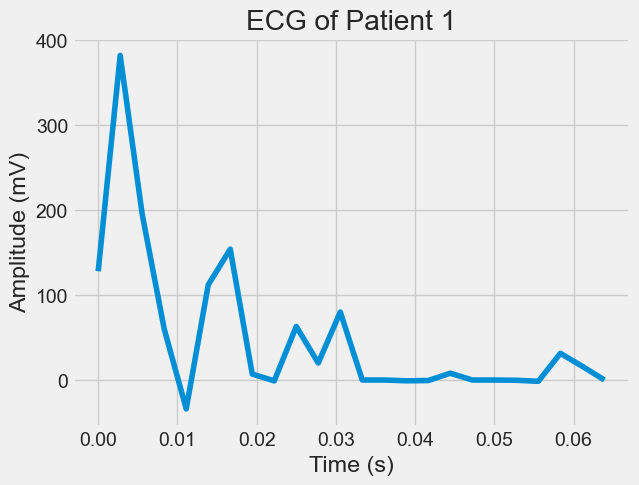

In [53]:
# Extract the ECG signals of the first patient (274 features)
ecg_signals = df.iloc[25, 5:].values.astype(float)  #[25, 5:]是选择第 26 行和从第 6 列开始的所有列
# Define the time axis
fs = 360  # Sampling frequency
t = np.arange(len(ecg_signals)) / fs

# Plot the ECG signal
plt.plot(t, ecg_signals)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('ECG of Patient 1')
plt.show()

KNN_Accuracy: 0.5934065934065934
Precision: 0.5813953488372093
Recall: 0.9803921568627451
F1 Score: 0.7299270072992701
Support: 51


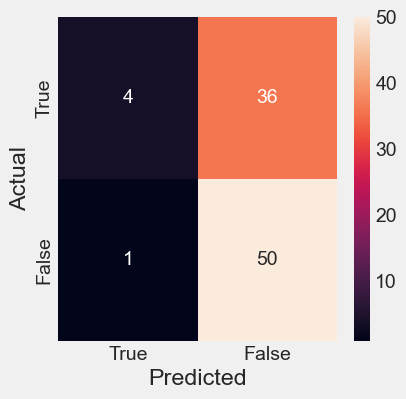

AUC score:  0.5401960784313725


Text(0, 0.5, 'True Positive Rate')

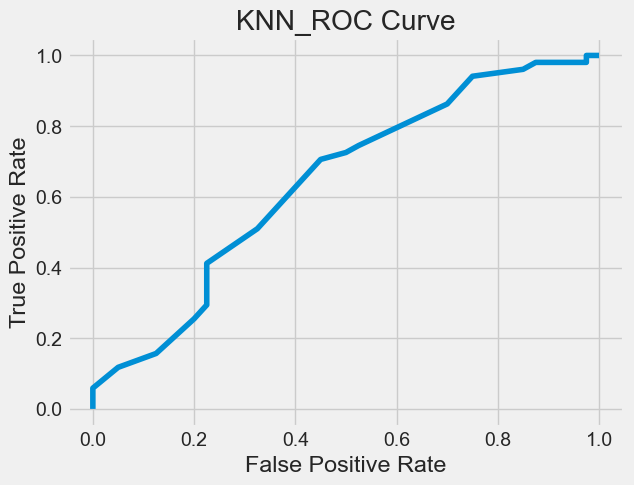

In [54]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# create KNN classifier
knn = KNeighborsClassifier(
        n_neighbors=45,
        weights="uniform",
        algorithm="auto",
        leaf_size=50,                       #较大的leaf_size值将使构建树更快，但可能会增加内存使用。
        p=5,                                #值为2对应欧几里得距离，值为1对应曼哈顿距离,8是切比雪夫距离。
        metric="minkowski",
        metric_params=None,
        n_jobs=None
)
knn.fit(X_train, y_train)

# predict on test data
y_predknn = knn.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
# 计算准确率
accknn = accuracy_score(y_test, y_predknn)
print('KNN_Accuracy:', accknn)
from sklearn.metrics import precision_recall_fscore_support
# Precision, Recall, F1 Score, Support
prfsknn = precision_recall_fscore_support(y_test, y_predknn)
print("Precision:", prfsknn[0][1])
print("Recall:", prfsknn[1][1])
print("F1 Score:", prfsknn[2][1])
print("Support:", prfsknn[3][1])

# create confusion matrix
conf_matknn = confusion_matrix(y_test, y_predknn)
# print('Confusion matrix:', conf_mat)
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(conf_matknn, annot=True, fmt='d',
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# predict probability of each class
y_pred_proba = knn.predict_proba(X_test)[::,-1]#选择测试数据集最后一列的所有元素
# compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_aucknn = auc(fpr, tpr)
aucknn = roc_auc_score(y_test, y_predknn)
print("AUC score: ", aucknn)
# plot ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_aucknn)
plt.title('KNN_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [55]:
# SVM

D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=102).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM_Accuracy: 0.6263736263736264
SVM_Precision: 0.6103896103896104
SVM_Recall: 0.9215686274509803


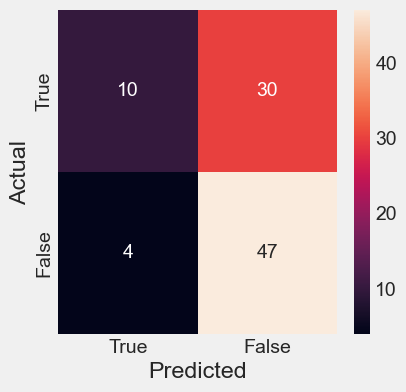

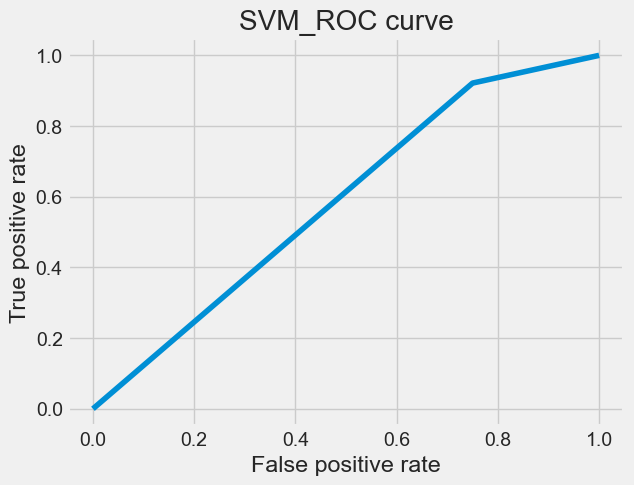

AUC score:  0.5857843137254901


In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
# perform grid search to find the best parameters for SVM
svm = SVC(
        C=1,
        kernel="rbf",
        degree=5,
        gamma="scale",
        coef0=0.0,                      #仅在核被设置为“poly”或“sigmoid”时使用。
        shrinking=True,
        probability=False,
        tol=1e-3,                       #较小的值将导致更准确的解，但也可能增加训练时间。
        cache_size=200,
        class_weight=None,
        verbose=False,
        max_iter=102,                   #优化算法的最大迭代次数。较大的值将导致更准确的解，但也可能增加训练时间。
        decision_function_shape="ovo",  #"ovr": One-vs-rest. "ovo": One-vs-one.
        break_ties=False,
        random_state=None
)
svm.fit(X_train, y_train)
y_pred_SVM = svm.predict(X_test)
# 计算准确率
acc_SVM = accuracy_score(y_test, y_pred_SVM)
print('SVM_Accuracy:', acc_SVM)

# 计算精确率
precisionsvm = precision_score(y_test, y_pred_SVM)
print('SVM_Precision:', precisionsvm)

# 计算召回率
recallsvm = recall_score(y_test, y_pred_SVM)
print('SVM_Recall:', recallsvm)

import seaborn as sns
# create confusion matrix
conf_matsvm = confusion_matrix(y_test, y_pred_SVM)
# print('Confusion matrix:', conf_mat)
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(conf_matsvm, annot=True, fmt='d',
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_SVM)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM_ROC curve')
plt.show()
aucsvm = roc_auc_score(y_test, y_pred_SVM)
print("AUC score: ", aucsvm)

RF_Accuracy: 0.7362637362637363
Precision: 0.7368421052631579
Recall: 0.8235294117647058
F1 Score: 0.7777777777777778
Support: 51
Confusion matrix: [[25 15]
 [ 9 42]]


D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


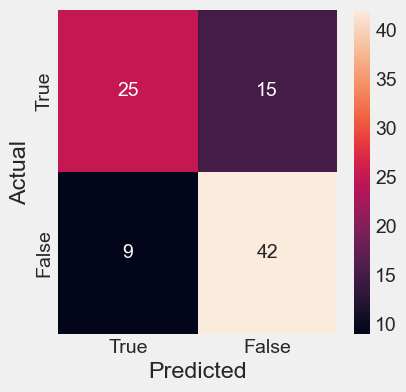

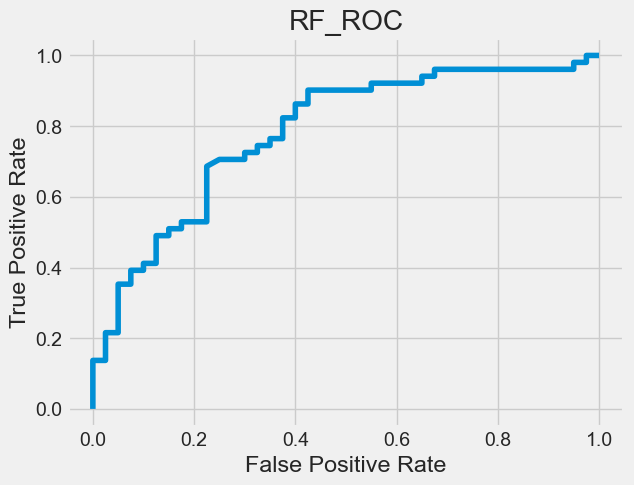

AUC得分： 0.782107843137255


In [57]:
# RF
rfc = RandomForestClassifier(
        n_estimators=35,                   #森林中树木的数量。树的数量越多，模型就越准确，但也会增加训练时间。
        criterion="gini",
        max_depth=30,                      #树的最大深度。更大的深度将导致更复杂的模型，但也可能增加过拟合的风险。
        min_samples_split=2,               #较大的值将导致模型更加保守，但也可能增加欠拟合的风险。
        min_samples_leaf=2,                #在一个叶节点上所需的最小样本数量。较大的值将导致模型更加保守，但也可能增加欠拟合的风险。
        min_weight_fraction_leaf=0.0,
        max_features="auto",
        max_leaf_nodes=None,
        min_impurity_decrease=0,
        bootstrap=True,
        oob_score=False,
        n_jobs=None,
        random_state=None,
        verbose=0,
        warm_start=False,
        class_weight=None,
        ccp_alpha=0,
        max_samples=None
                             )
rfc.fit(X_train, y_train)
y_predrf = rfc.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
# 计算准确率
accrf = accuracy_score(y_test, y_predrf)
print('RF_Accuracy:', accrf)
from sklearn.metrics import precision_recall_fscore_support
# Precision, Recall, F1 Score, Support
prfs = precision_recall_fscore_support(y_test, y_predrf)
print("Precision:", prfs[0][1])
print("Recall:", prfs[1][1])
print("F1 Score:", prfs[2][1])
print("Support:", prfs[3][1])


# create confusion matrix
y_predrf=rfc.predict(X_test)
conf_matrf = confusion_matrix(y_test, y_predrf)
print('Confusion matrix:', conf_matrf)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(conf_matrf, annot=True, fmt='d',
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 画出ROC曲线并计算AUC得分
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF_ROC')
plt.show()
auc_scorerf = roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])
print("AUC得分：", auc_scorerf)

In [58]:
# CNN

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Build and compile the model
model = Sequential()#实例化一个 Keras 的 Sequential 模型，用于构建一个 CNN 模型。
model.add(Conv1D(filters=14, kernel_size=7, activation='sigmoid', input_shape=(X_train.shape[1], 1)))#卷积层
model.add(MaxPooling1D(pool_size=4))#最大池化层
model.add(Flatten())#使用 Flatten 将卷积层输出的三维数据压平为一维
model.add(Dense(16, activation='sigmoid'))#全连接层：其中隐藏单元数量为 16，并使用 ReLU 激活函数。
model.add(Dense(1, activation='sigmoid'))#输出层：隐藏单元数量为 1，并使用 sigmoid 激活函数。
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Reshape input data for CNN
X_train = X_train.reshape(-1, X_train.shape[1], 1)#数据格式化：使用 reshape 函数将训练数据和测试数据的数据格式更改为适合 CNN 模型的三维数据。
X_test = X_test.reshape(-1, X_test.shape[1], 1)
# Train the model
history = model.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_test, y_test))
# Evaluate the model
y_predcnn = model.predict(X_test).round().flatten()
# 计算准确率
acccnn = accuracy_score(y_test, y_predcnn)
print('CNN_Accuracy:', acccnn)
from sklearn.metrics import precision_recall_fscore_support
# Precision, Recall, F1 Score, Support
prfcnn = precision_recall_fscore_support(y_test, y_predcnn)
print("Precision:", prfcnn[0][1])
print("Recall:", prfcnn[1][1])
print("F1 Score:", prfcnn[2][1])
print("Support:", prfcnn[3][1])

Epoch 1/70
12/12 [==============================] - 1s 16ms/step - loss: 0.8552 - accuracy: 0.5374 - val_loss: 0.7563 - val_accuracy: 0.5604
Epoch 2/70
12/12 [==============================] - 0s 4ms/step - loss: 0.7417 - accuracy: 0.5374 - val_loss: 0.6967 - val_accuracy: 0.5604
Epoch 3/70
12/12 [==============================] - 0s 4ms/step - loss: 0.6975 - accuracy: 0.5374 - val_loss: 0.6858 - val_accuracy: 0.5604
Epoch 4/70
12/12 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5374 - val_loss: 0.6883 - val_accuracy: 0.5604
Epoch 5/70
12/12 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5374 - val_loss: 0.6882 - val_accuracy: 0.5604
Epoch 6/70
12/12 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5374 - val_loss: 0.6873 - val_accuracy: 0.5604
Epoch 7/70
12/12 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.5374 - val_loss: 0.6870 - val_accuracy: 0.5604
Epoch 8/70
12/12 [=

D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
# 混合算法  分类器分别是 knn svm  rfc
# 定义投票分类器
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
voting_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('rf', rfc)], voting='soft')
# 训练模型
voting_clf.fit(X_train, y_train)

# 在测试集上进行预测
y_predvot = voting_clf.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_predvot)
precision = precision_score(y_test, y_predvot)
recall = recall_score(y_test, y_predvot)
f1 = f1_score(y_test, y_predvot)

# 绘制混淆矩阵
plot_confusion_matrix(voting_clf, X_test, y_test)

# 绘制ROC曲线
plot_roc_curve(voting_clf, X_test, y_test)


ValueError: Found array with dim 3. SVC expected <= 2.